In [1]:
import numpy as np
import pandas as pd
import os, time

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA as PCAs
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features import PCA as PCAy
import matplotlib as mpl
import numpy as np
import math
from sklearn.cluster import DBSCAN
from sklearn import metrics
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('datasets/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

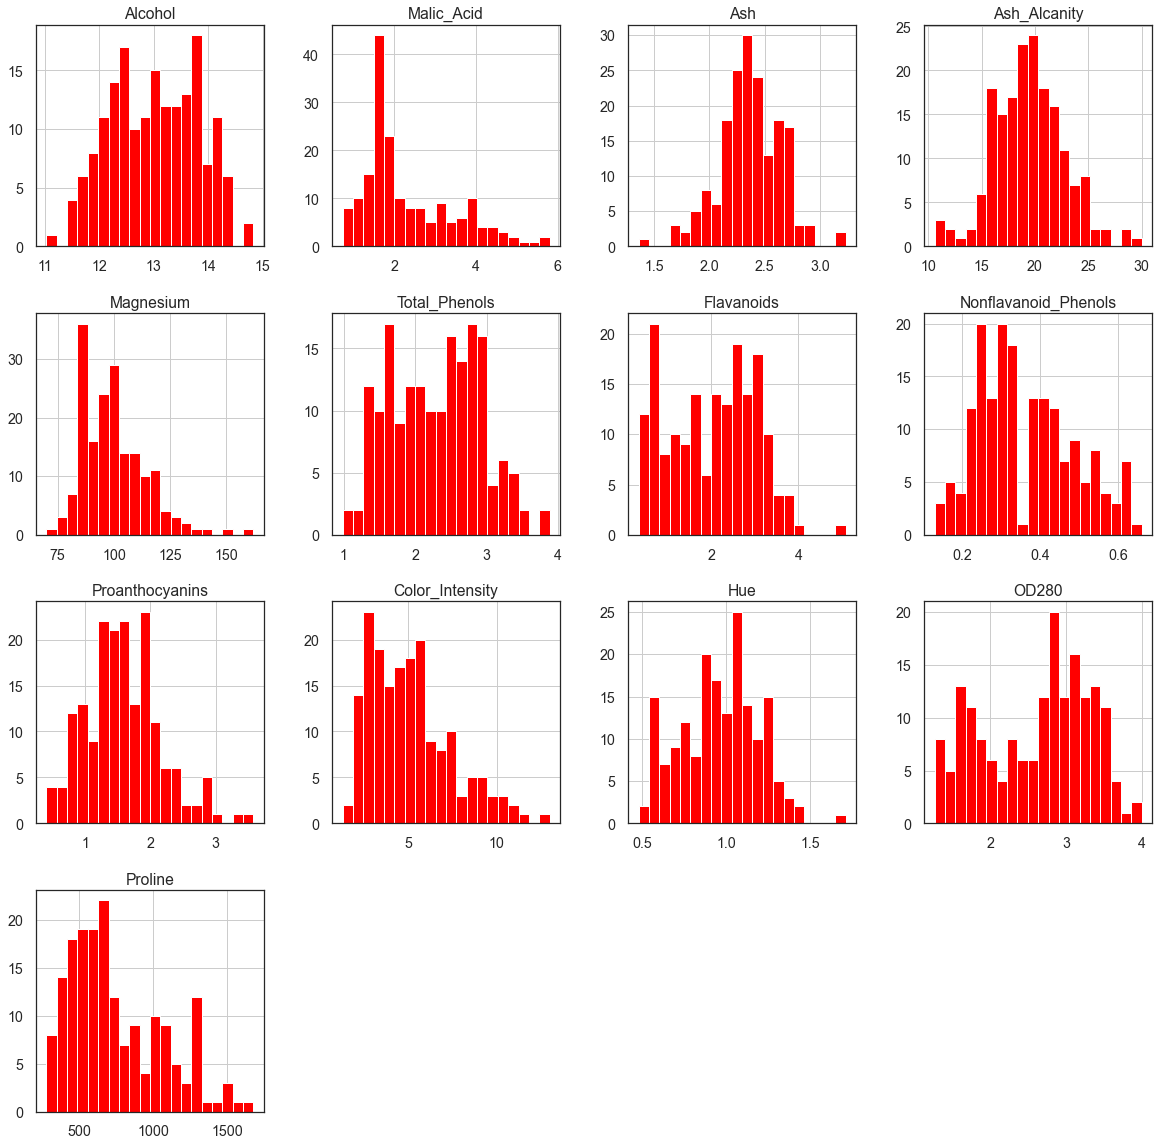

In [4]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='red' )

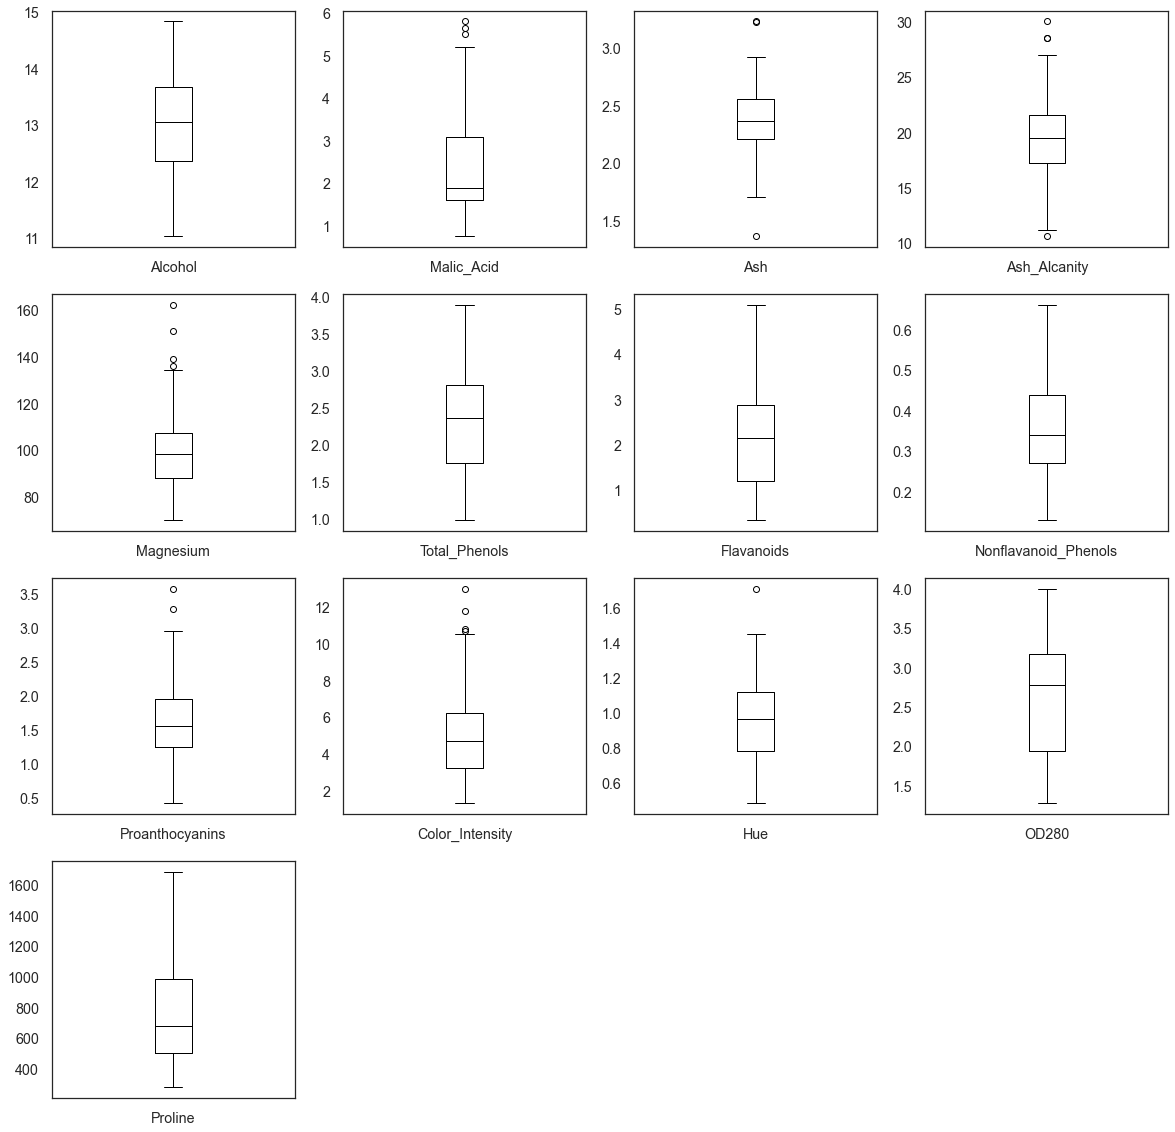

In [5]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black');

In [6]:
ss = StandardScaler()

ss.fit(df)

StandardScaler()

In [7]:
df_pp = pd.DataFrame(ss.transform(df), columns=df.columns)
df_pp.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [102]:
random_state=42
np.random.seed(42)
metrics = dict(clusters=[], silhouette=[], n_clusters=[], min_samples=[])


n_clusters = 15
for min_samples in range(2, 102, 2):
    pipe = Pipeline(steps=[
        ('pca', PCAs(n_components=0.9, random_state=random_state)),
        ('clustering', DBSCAN(eps=1.8, min_samples=min_samples, leaf_size=10, p=0.02))
    ])    

    clusters = pipe.fit_predict(df_pp)
    n_clusters = len(set(clusters))
    if n_clusters < 2:
        continue
    silhouette = silhouette_score(df_pp, clusters, metric='euclidean', sample_size=20)
    
    metrics['silhouette'].append(silhouette)
    metrics['clusters'].append(clusters)
    metrics['n_clusters'].append(n_clusters)
    metrics['min_samples'].append(min_samples)
    
    print(f'clusters :{n_clusters} - silhouette:{silhouette:.3f} - min_samples:{min_samples}')

clusters :8 - silhouette:-0.025 - min_samples:2
clusters :3 - silhouette:0.168 - min_samples:4
clusters :5 - silhouette:0.032 - min_samples:6
clusters :3 - silhouette:-0.031 - min_samples:8
clusters :4 - silhouette:-0.021 - min_samples:10
clusters :3 - silhouette:0.081 - min_samples:12
clusters :3 - silhouette:0.026 - min_samples:14
clusters :2 - silhouette:0.156 - min_samples:16
clusters :2 - silhouette:-0.047 - min_samples:18


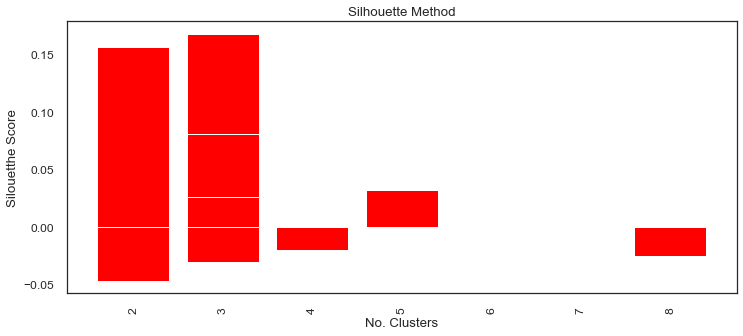

In [101]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})
plt.subplots()
max_silhouette = max(metrics['silhouette'])
index = metrics['silhouette'].index(max_silhouette)
silhouette_cluster = metrics['silhouette'].index(max_silhouette) + 2

n = len(metrics['silhouette'])
plt.bar(metrics['n_clusters'], height=metrics['silhouette'], color='red')
#plt.plot(index, max_silhouette, 'o', linewidth=2, markersize=12, color='green')
#plt.plot([3, index], 2*[max_silhouette], '--', linewidth=2, markersize=12, color='green')
#plt.plot([index, index], [0, max_silhouette], '--', linewidth=2, markersize=12, color='green')
plt.xticks(range(min(metrics['n_clusters']), max(metrics['n_clusters'])+1, 1), rotation=90)
plt.title('Silhouette Method')
plt.xlabel('No. Clusters')
plt.ylabel('Silouetthe Score')
plt.show()

In [108]:
random_state=42
n_cluster=4
pipe = Pipeline(steps=[
    ('pca', PCAs(n_components=0.9, random_state=random_state)),
    ('clustering', DBSCAN(eps=1.8, min_samples=10, leaf_size=10))
])   

pipe.fit(df_pp)

Pipeline(steps=[('pca', PCA(n_components=0.9, random_state=42)),
                ('clustering', DBSCAN(eps=1.8, leaf_size=10, min_samples=10))])

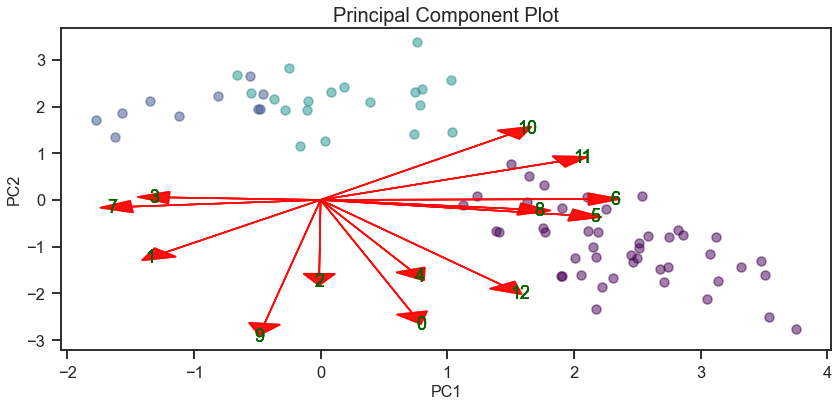

In [109]:
def biplot_list(pipe, df_scaled, segs_list=[None], scale_list=[None], cluster_list=[None], figsize=(12,6), components=(0,1)):
    sns.set_theme(style="ticks", context="talk", palette="rocket")
    
    pcx, pcy = components
    feature_names = df_scaled.columns
    segs = feature_names if segs_list==[None] else segs_list
    
    index_filter = df_scaled.columns.isin(segs)
    features_to_show = feature_names[index_filter]
    scale = len(features_to_show)*[5] if scale_list==[None] else len(features_to_show)*scale_list
    fig, ax = plt.subplots(figsize=figsize)
    
    df_pca = pipe.named_steps['pca'].transform(df_scaled)
    v = pd.DataFrame(pipe.named_steps['pca'].components_.T, index=feature_names) # features, components
    
    algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'predict') else False
    if algo_has_attr:    
        clusters = pipe.predict(df_pp)
        centroids = pipe.named_steps['clustering'].cluster_centers_
    else:
        clusters = pipe.fit_predict(df_pp)
    n_clusters = len(set(clusters))
    
    algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'cluster_centers_indices_') else False
    if algo_has_attr:
        clusters_centers_indices  = pipe.named_steps['clustering'].cluster_centers_indices_
    
    # plot components
    cluster_list = range(n_clusters) if cluster_list==[None] else cluster_list
    
    colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, n_clusters+1)))
    for _, clust in zip(colors, cluster_list):
        df_pca_n_cluster = df_pca[clusters==clust]
        algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'cluster_centers_') else False
        if algo_has_attr: 
            centroids_n_cluster = centroids[clust]        
            
        n_clusters = clusters[clusters==clust]
        
        color = colors.by_key()['color'][clust]
        # plot components
        scatter = ax.scatter(df_pca_n_cluster[:, pcx], df_pca_n_cluster[:, pcy], color=color, alpha=0.5) # color['color']
        algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'cluster_centers_') else False
        if algo_has_attr:
            for pt in df_pca_n_cluster:
                plt.plot([centroids_n_cluster[pcx], pt[pcx]], [centroids_n_cluster[pcy], pt[pcy]], color=color) #color['color']
            
        #legend = ax.legend(*scatter.legend_elements(), loc="upper right", bbox_to_anchor=(1.2, clust*0.05 + 0.02))
        #ax.add_artist(legend)
        
        # mark centroids
        algo_has_attr = True if hasattr(pipe.named_steps['clustering'], 'cluster_centers_') else False
        if algo_has_attr:
            plt.scatter(centroids[clust, pcx], centroids[clust, pcy], marker="$%d$" % clust, s=100, linewidths=2, color="cyan", zorder=10)
        
        # plot arrow
        for n_feature, feature in enumerate(features_to_show):
            x, y = scale[n_feature]*v.loc[feature, pcx], scale[n_feature]*v.loc[feature, pcy] 
            plt.arrow(0, 0, x, y, color = 'red', alpha = 0.5, head_length=0.25, head_width=0.25)
            plt.text(x*1.1, y*1.1, n_feature, color='darkgreen', ha='center', va='center')


    
    ax.set_xlabel(f'PC{pcx+1}', fontsize=16)
    ax.set_ylabel(f'PC{pcy+1}', fontsize=16)
    ax.set_title('Principal Component Plot', fontsize=20)
    plt.tight_layout()
    plt.show()
    arrow_dict = dict(zip(range(len(features_to_show)), features_to_show))
    return fig, arrow_dict

# scale_list <= number of features
# cluster_list <= number of clusters
# segs_list <= feature names to graph



_, arrow_dict = biplot_list(pipe, df_pp, scale_list=[None], cluster_list=[None], segs_list=[None], components=(0, 1));

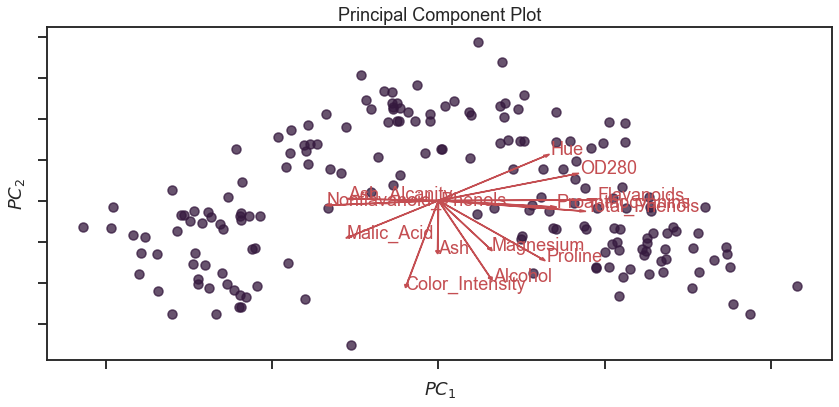

In [110]:
plt.figure(figsize=(12,6))

visualizer = PCAy(scale=True, proj_features=True)
visualizer.fit_transform(df_pp, clusters)
visualizer.show();

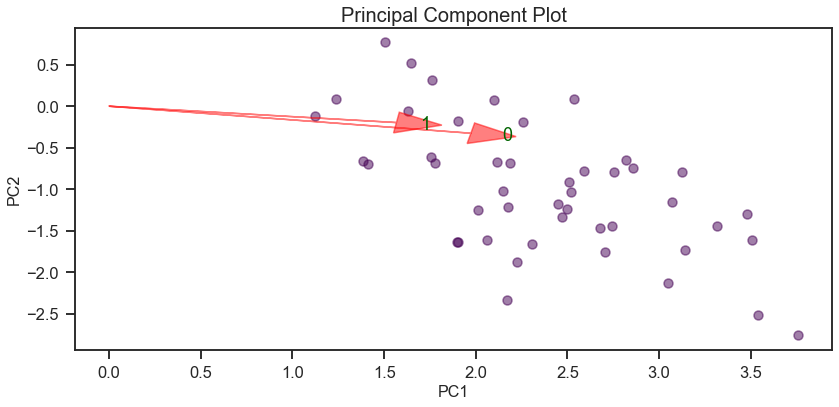

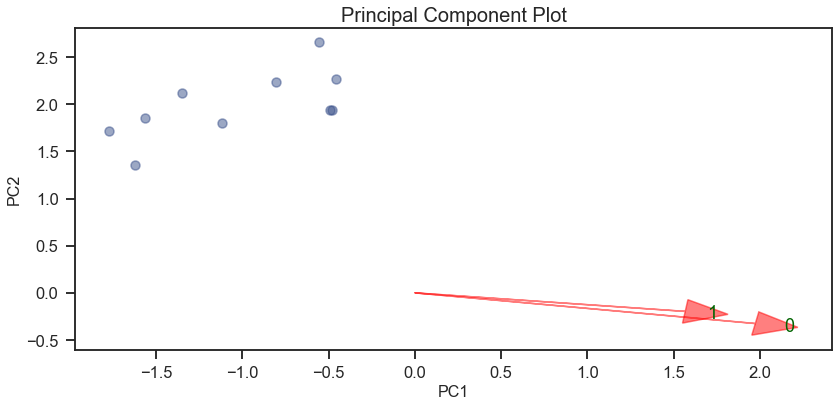

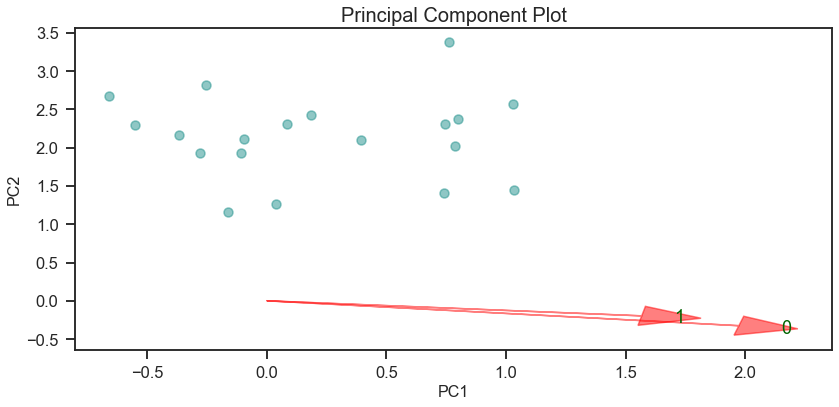

In [111]:
for i in range(3):
    _, arrow_dict = biplot_list(pipe, df_pp, scale_list=[5], cluster_list=[i], segs_list=['Total_Phenols', 'Proanthocyanins'], components=(0, 1));